In [1]:
#Including the needed libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reading from the csv file
covid = pd.read_csv("corona_0083.csv")

covid.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,12/11/2020,0,0,0,0,0,negative,No,male,Other
1,12/11/2020,0,1,0,0,0,negative,No,male,Other
2,12/11/2020,0,0,0,0,0,negative,Yes,female,Other
3,12/11/2020,0,0,0,0,0,negative,No,male,Other
4,12/11/2020,0,1,0,0,0,negative,No,male,Contact with confirmed


In [2]:
#info of data

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   test_date            1048575 non-null  object
 1   cough                1048575 non-null  int64 
 2   fever                1048575 non-null  int64 
 3   sore_throat          1048575 non-null  int64 
 4   shortness_of_breath  1048575 non-null  int64 
 5   head_ache            1048575 non-null  int64 
 6   corona_result        1048575 non-null  object
 7   age_60_and_above     996710 non-null   object
 8   gender               1045695 non-null  object
 9   test_indication      1048575 non-null  object
dtypes: int64(5), object(5)
memory usage: 80.0+ MB


### Data Cleaning

In [3]:
#check for duplicates
covid.duplicated().sum()

1034962

In [4]:
#eliminate duplicates
covid.drop_duplicates()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,12/11/2020,0,0,0,0,0,negative,No,male,Other
1,12/11/2020,0,1,0,0,0,negative,No,male,Other
2,12/11/2020,0,0,0,0,0,negative,Yes,female,Other
4,12/11/2020,0,1,0,0,0,negative,No,male,Contact with confirmed
5,12/11/2020,1,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
1048526,10/09/2020,1,1,1,0,1,positive,No,female,Contact with confirmed
1048536,10/09/2020,1,1,0,1,0,positive,No,female,Other
1048542,10/09/2020,0,1,0,0,0,negative,No,female,Contact with confirmed
1048543,10/09/2020,1,1,0,0,1,positive,Yes,female,Other


In [5]:
#check for missing values
covid.isnull().sum()

test_date                  0
cough                      0
fever                      0
sore_throat                0
shortness_of_breath        0
head_ache                  0
corona_result              0
age_60_and_above       51865
gender                  2880
test_indication            0
dtype: int64

In [6]:
covid['age_60_and_above'].value_counts()

No     864393
Yes    132317
Name: age_60_and_above, dtype: int64

In [7]:
#impute missing data with mode

covid['age_60_and_above'] = covid['age_60_and_above'].fillna('No')

In [8]:
covid['gender'].value_counts()

female    537182
male      508513
Name: gender, dtype: int64

In [9]:
#impute missing data with mode

covid['gender'] = covid['gender'].fillna('female')

In [10]:
#confirm null values have been eliminated
covid.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [11]:
covid.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696994e-02,2.735713e-02,9.093293e-03,2.758029e-03,1.908209e-02
std,1.619956e-01,1.631219e-01,9.492425e-02,5.244449e-02,1.368137e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Data Visualization

In [12]:
covid['corona_result'].value_counts()

negative    925290
positive    105434
other        17851
Name: corona_result, dtype: int64

[Text(0.5, 1.0, 'Corona results')]

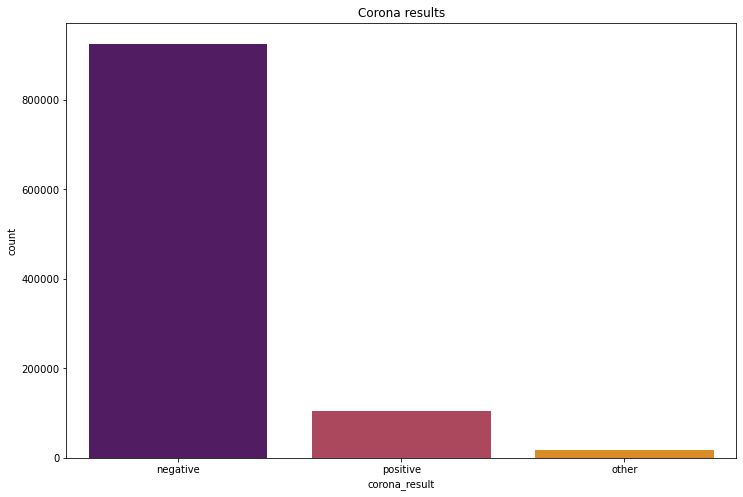

In [13]:
#Number of positive, negative and other cases

plt.figure(figsize = (12,8))
sns.countplot(x = 'corona_result', data = covid, palette = 'inferno').set(title = 'Corona results')

                            Most people tested negative

[Text(0.5, 1.0, 'Covid results and gender of tested')]

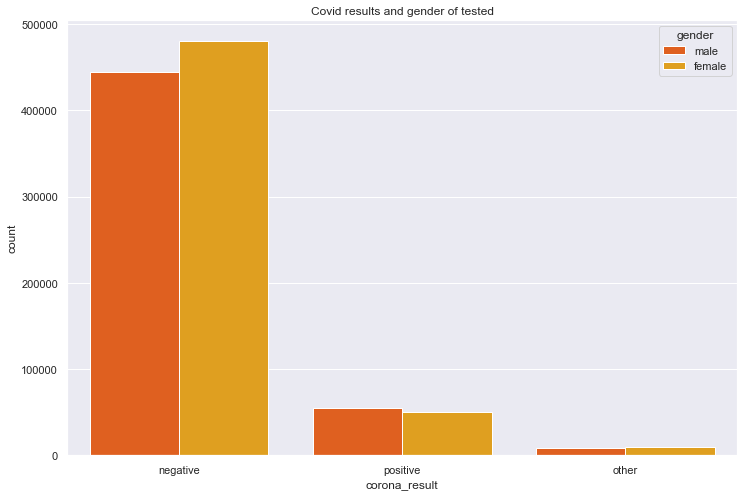

In [14]:
#Gender of tested people and their results
sns.set(rc = {'figure.figsize': (12,8)})
sns.countplot(x = 'corona_result', hue = 'gender',
              data = covid, palette = 'autumn').set(title = 'Covid results and gender of tested')

                            Slightly more males than females tested positive

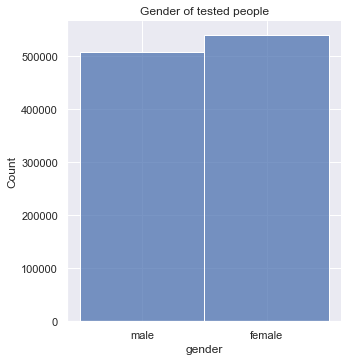

In [15]:
#Overall gender of tested people
sns.displot(x = 'gender', data = covid, palette = 'husl').set(title = 'Gender of tested people')

                                 Generally, Females were a majority

[Text(0, 0.5, 'No of people'), Text(0.5, 1.0, 'Age_60_and_above')]

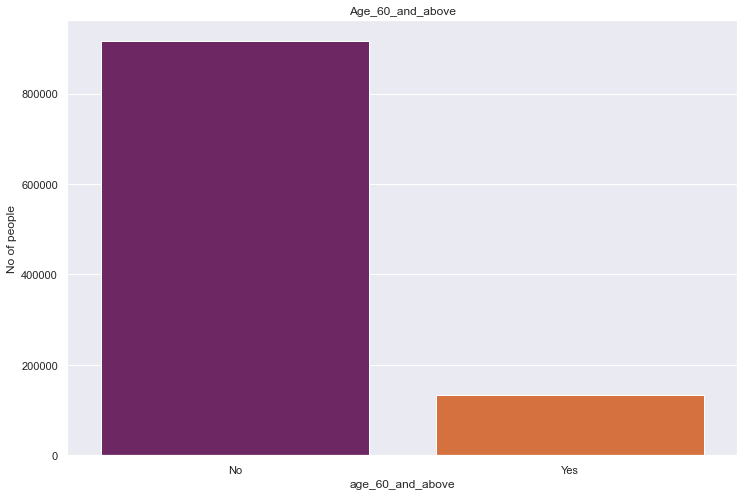

In [16]:
#How many People are above 60? 
sns.countplot(x = 'age_60_and_above',
              data = covid, palette = 'inferno').set(ylabel = 'No of people', title ='Age_60_and_above')

In [17]:
above_60_yrs = covid.loc[covid['age_60_and_above']  == 'Yes']

[Text(0.5, 1.0, 'Corona Results of people above 60 years')]

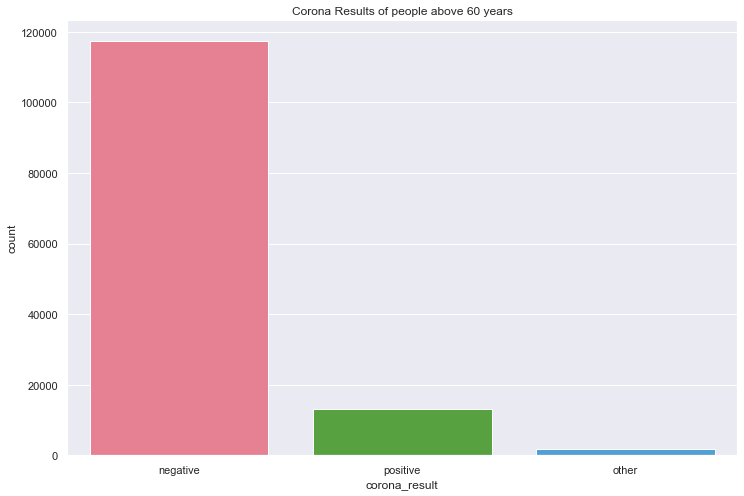

In [18]:
#results for people above 60
sns.countplot(x = 'corona_result', data = above_60_yrs, palette = 'husl').set(title = 'Corona Results of people above 60 years')

                        A majority of people tested above 60 years tested negative

[Text(0.5, 1.0, 'Overall Gender of people above 60 years')]

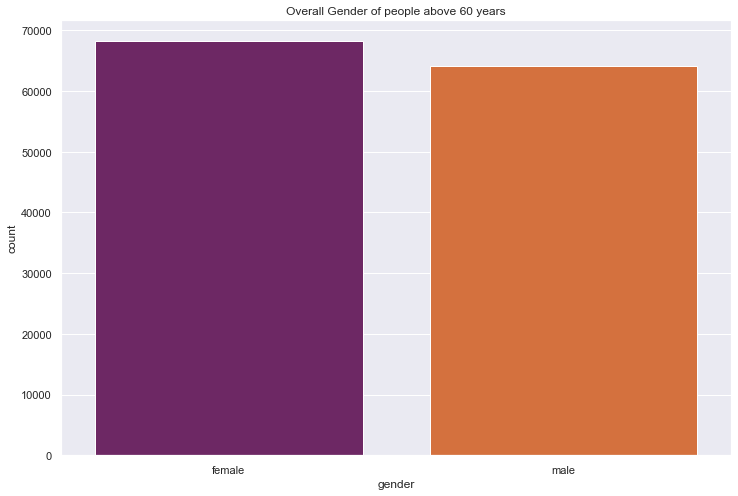

In [19]:
#Gender of people above 60
sns.countplot(x = 'gender', data = above_60_yrs, palette = 'inferno').set(title = 'Overall Gender of people above 60 years')

                        A majority of people above 60 years were females

[Text(0, 0.5, 'No of people'),
 Text(0.5, 1.0, 'Gender of positive cases for people age 60 and above')]

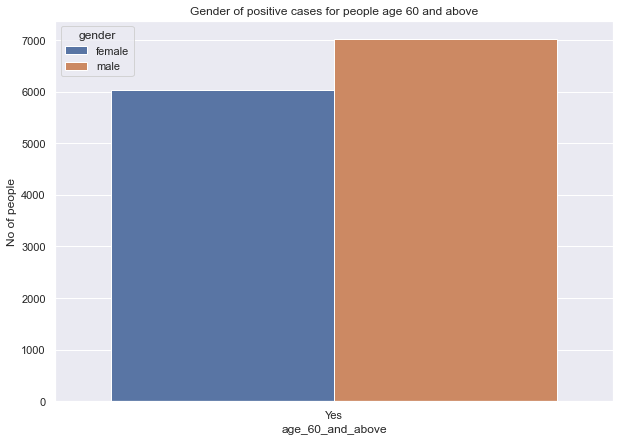

In [20]:
positive = covid.loc[(covid['corona_result'] == 'positive') & (covid['age_60_and_above'] == 'Yes')]

sns.set(rc = {'figure.figsize': (10,7)})
sns.countplot(x = 'age_60_and_above', 
              hue = 'gender', 
              data = positive).set(ylabel = 'No of people', title = 'Gender of positive cases for people age 60 and above')

                             A majority of people above 60 who tested positive were males

[Text(0.5, 1.0, 'Test indication of positive cases')]

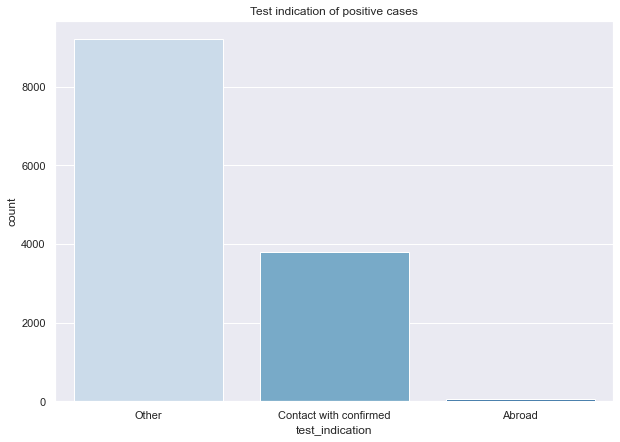

In [21]:
#Test indication of positive cases
sns.countplot(x = 'test_indication', data = positive, palette = 'Blues').set(title = 'Test indication of positive cases')

[Text(0.5, 1.0, 'test_indication for positive cases and the genders')]

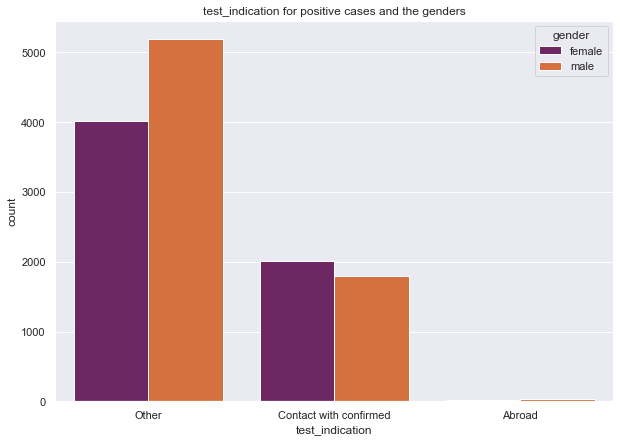

In [22]:
#Gender and test_indication for positive cases
sns.countplot(x = 'test_indication', hue = 'gender', palette = 'inferno',
              data = positive).set(title = 'test_indication for positive cases and the genders')

    Test Indication                
    Other                        More males than females 
    Contact with confirmed       More females than males had contact with confirmed cases

##### Checking for Most common Symptoms among positive cases

[Text(0.5, 1.0, 'Positive cases that had fever')]

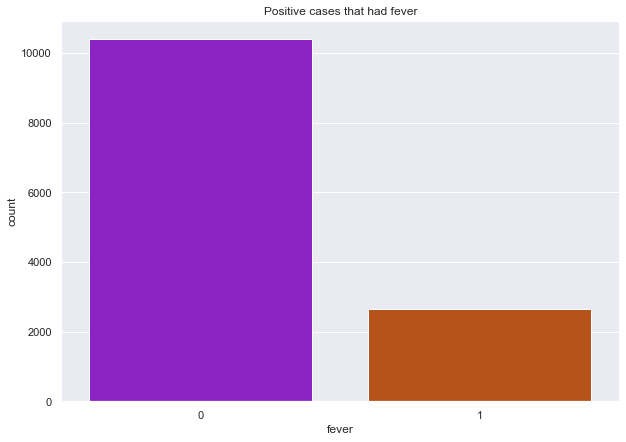

In [23]:
sns.countplot(x = 'fever', data = positive, palette = 'gnuplot').set(title = 'Positive cases that had fever')

[Text(0.5, 1.0, 'Positive cases that had cough')]

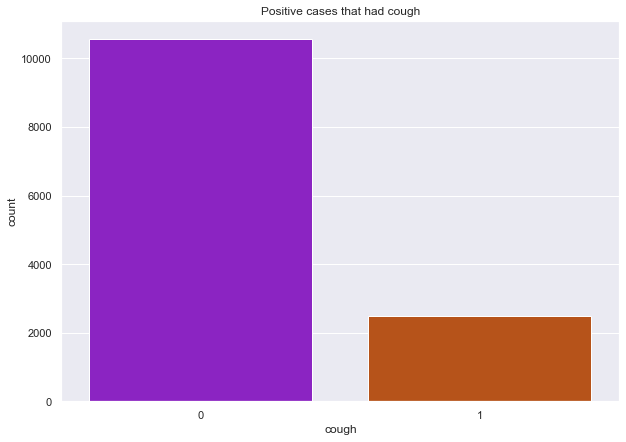

In [24]:
sns.countplot(x = 'cough', data = positive, palette = 'gnuplot').set(title = 'Positive cases that had cough')

[Text(0.5, 1.0, 'Positive cases that had shortness_of_breath')]

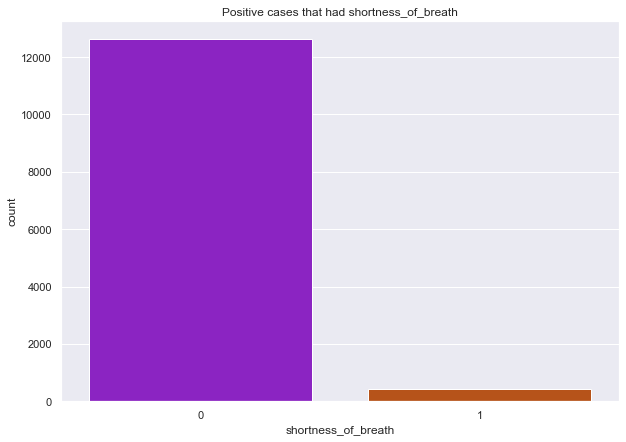

In [25]:
sns.countplot(x = 'shortness_of_breath', data = positive, 
              palette = 'gnuplot').set(title = 'Positive cases that had shortness_of_breath')

[Text(0.5, 1.0, 'Positive cases that had sore_throat')]

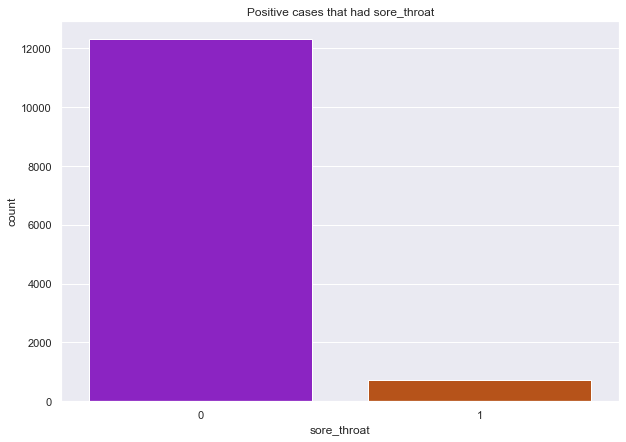

In [26]:
sns.countplot(x = 'sore_throat', data = positive, 
              palette = 'gnuplot').set(title = 'Positive cases that had sore_throat')

[Text(0.5, 1.0, 'Positive cases that had head_ache')]

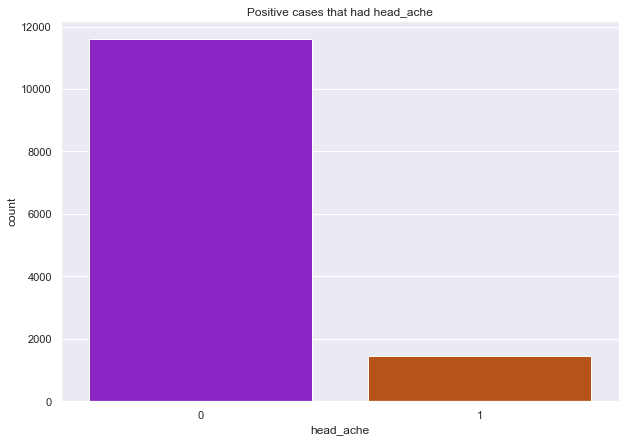

In [27]:
sns.countplot(x = 'head_ache', data = positive, 
              palette = 'gnuplot').set(title = 'Positive cases that had head_ache')

                Cough and fever were the most common symptoms among the positive cases

In [33]:
covid['corona_result'].unique()

array(['negative', 'positive', 'other'], dtype=object)

### Extracting month date and year

In [34]:
from datetime import datetime
def time_column_gen(time_column, data, to_drop = False):
    
  # Extract values of time
    time_values = data[time_column].values

  # Extract month, year, day and day of week from startdate
    month = [datetime.strptime(value, '%d/%m/%Y').month for value in time_values]
    year = [datetime.strptime(value, '%d/%m/%Y').year for value in time_values]
    day = [datetime.strptime(value, '%d/%m/%Y').day for value in time_values]
    day_of_week = [datetime.strptime(value, '%d/%m/%Y').isoweekday() for value in time_values] 

  # create columns
    data['Month'] = month
    data['Year'] = year
    data['Day'] = day
    data['Day_of_week'] = day_of_week

# drop original column
    if to_drop:
        new_data = data.drop(time_column, axis=1)
    else:
        new_data = data.copy()
    return new_data


In [35]:
corona = time_column_gen('test_date',covid,True)

In [36]:
corona.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,other,Month,Year,Day,Day_of_week
0,0,0,0,0,0,negative,No,male,Other,negative,11,2020,12,4
1,0,1,0,0,0,negative,No,male,Other,negative,11,2020,12,4
2,0,0,0,0,0,negative,Yes,female,Other,negative,11,2020,12,4
3,0,0,0,0,0,negative,No,male,Other,negative,11,2020,12,4
4,0,1,0,0,0,negative,No,male,Contact with confirmed,negative,11,2020,12,4


### Convert categorical to numerical data

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

corona.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication',
       'other', 'Month', 'Year', 'Day', 'Day_of_week'],
      dtype='object')

In [38]:
categorical_columns = [column for column in corona.columns if corona[column].dtype == 'object']

for column in categorical_columns:
    corona[column] = encoder.fit_transform(corona[column])

### Drop Unnecessary columns

<AxesSubplot:>

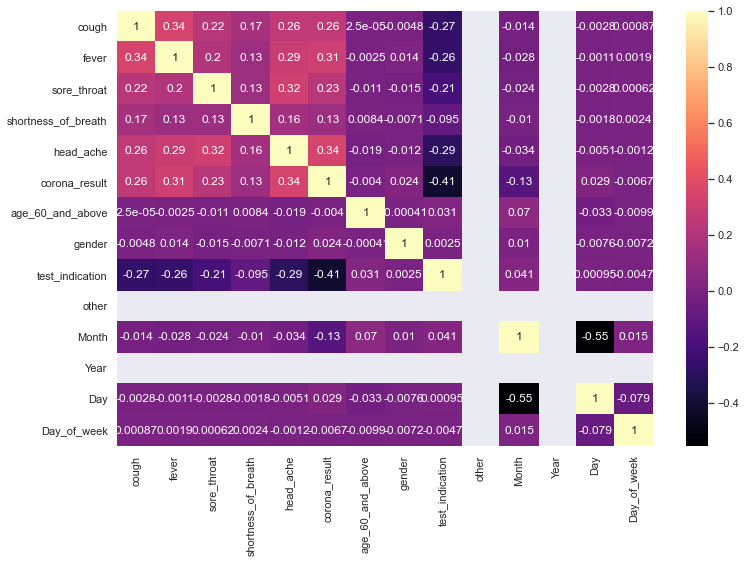

In [39]:
corr_matrix = corona.corr()

sns.set(rc = {'figure.figsize': (12,8)})
sns.heatmap(corr_matrix, cmap='magma', annot=True)

In [40]:
corona.drop(['Day_of_week', 'test_indication'], axis=1, inplace=True)
corona.drop(['age_60_and_above', 'gender', 'Month','Day'], axis=1, inplace=True)

In [41]:
corona.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,other,Year
0,0,0,0,0,0,0,0,2020
1,0,1,0,0,0,0,0,2020
2,0,0,0,0,0,0,0,2020
3,0,0,0,0,0,0,0,2020
4,0,1,0,0,0,0,0,2020


In [42]:
corona.drop('Year', axis = 1, inplace = True)

### Modelling - Classification

In [43]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report

In [44]:
#Splitting data
x = corona.drop('corona_result', axis = 1)
y = corona['corona_result']

In [45]:
#Train
x_train, x_hold, y_train, y_hold = train_test_split(x, y)

#Test and validate
x_test, x_val, y_test, y_val = train_test_split(x_hold, y_hold)

In [46]:
x_train

,cough,fever,sore_throat,shortness_of_breath,head_ache,other
875684,0,0,0,0,0,0
639067,0,0,0,0,1,0
701471,0,0,0,0,0,0
410204,0,0,0,0,0,0
577968,0,0,0,0,0,0
...,...,...,...,...,...,...
707130,1,0,0,0,1,0
447958,0,0,0,0,0,0
715160,0,0,0,0,0,0
485745,0,0,0,0,0,0


In [47]:
#instantiate models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

models = [lr, dt, rf, svc]

In [48]:
dt.fit(x_train, y_train)
predictions = dt.predict(x_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     57922
           1       0.00      0.00      0.00      1135
           2       0.72      0.31      0.43      6479

    accuracy                           0.90     65536
   macro avg       0.54      0.43      0.46     65536
weighted avg       0.88      0.90      0.88     65536



C:\Users\Nkatha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nkatha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nkatha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
lr.fit(x_train, y_train)
predictions = lr.predict(x_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     57922
           1       0.00      0.00      0.00      1135
           2       0.77      0.22      0.34      6479

    accuracy                           0.90     65536
   macro avg       0.56      0.40      0.43     65536
weighted avg       0.87      0.90      0.87     65536



C:\Users\Nkatha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nkatha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nkatha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
import joblib

joblib.dump(dt, 'DecisionT.pkl')
joblib.dump(lr, 'linear.pkl')

['linear.pkl']